1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [30]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

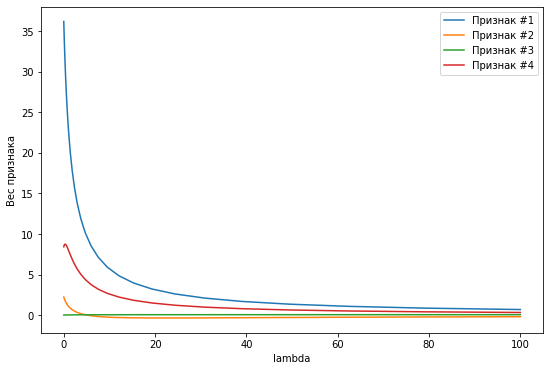

In [31]:
n = 50
coeffs = np.zeros((n, X.shape[1]))
lambda_values = np.logspace(-3, 2, n)
fig, ax = plt.subplots(1, figsize=(9, 6))
ax.set_xlabel('lambda')
ax.set_ylabel('Вес признака')
for i, lambda_value in enumerate(lambda_values):
    ridge = Ridge(alpha=lambda_value, fit_intercept=False)
    ridge.fit(X, y)
    coeffs[i, :] = ridge.coef_.flatten()
for i in range(X.shape[1]):
    ax.plot(lambda_values, coeffs[:, i], label=f'Признак #{i + 1}')
ax.legend(loc='upper right')

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Очевидно, что:
$$norm(standard(X)) = \frac{X / std(X) - \overline{X} / std(X) - min(X) / std(X) + \overline{X} / std(X)}{max(X) / std(X) - \overline{X} / std(X) - min(X) / std(X) + \overline{X} / std(X)} = \frac{X - min(X)}{max(X) - min(X)} = norm(X)$$
То есть получаем по определению нормализованные значения $X$.

Кроме того:
$$standard(norm(X)) = \frac{(X - min(X)) / (max(X) - min(X)) - (\overline{X} - min(X)) / (max(X) - min(X))}{std(X) / (max(X) - min(X))} = \frac{X - \overline{X}}{std(X)}$$
То есть получаем по определению стандартизованные значения $X$. Проверим, что это действительно так:

In [32]:
def standard(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)


def normal(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [38]:
X_norm = X.copy().astype('float64')
X_norm[:, 1:] = normal(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([1., 0., 0., 0.]), array([1., 1., 1., 1.]))

In [39]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([1.        , 0.3       , 0.33870968, 0.35      ]),
 array([0.        , 0.28284271, 0.31283671, 0.39051248]))

In [41]:
X_norm_standard = X_norm.copy().astype('float64')
X_norm_standard[:, 1:] = standard(X_norm[:, 1:])
X_norm_standard.min(axis=0), X_norm_standard.max(axis=0)

(array([ 1.        , -1.06066017, -1.08270439, -0.89625816]),
 array([1.        , 2.47487373, 2.11385144, 1.66447944]))

In [42]:
X_norm_standard.mean(axis=0), X_norm_standard.std(axis=0)

(array([ 1.00000000e+00, -1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([0., 1., 1., 1.]))

Стандартизация без нормализации:

In [43]:
X_standard = X.copy().astype('float64')
X_standard[:, 1:4] = standard(X.copy().astype('float64')[:, 1:4])
X_standard.min(axis=0), X_standard.max(axis=0)

(array([ 1.        , -1.06066017, -1.08270439, -0.89625816]),
 array([1.        , 2.47487373, 2.11385144, 1.66447944]))

In [44]:
X_standard.mean(axis=0), X_standard.std(axis=0)

(array([1.00000000e+00, 2.22044605e-17, 2.49800181e-17, 8.32667268e-17]),
 array([0., 1., 1., 1.]))

In [45]:
X_standard - X_norm_standard

array([[0.00000000e+00, 2.22044605e-16, 2.22044605e-16, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.66533454e-16, 1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 1.11022302e-16, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.96261557e-16, 1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 1.11022302e-16, 2.22044605e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, 0.00000000e+00],
       [0.00000000e+00, 1.66533454e-16, 4.85722573e-17, 0.00000000e+00]])

Получили те же стандартизованные значения, что при проведении стандартизации после нормализации. Значит, применить сразу и нормализацию, и стандартизацию можно.

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [46]:
def calc_mse(y, y_pred):
  return np.mean((y - y_pred)**2)

In [50]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (2./n * np.dot(X.T, (y_pred - y)) + lambda_ * (W / np.abs(W))) 
        if (i) % (iterations / 10) == 0:
            print(i, W, err)
    return W

eval_model_reg1(X_standard, y, iterations=5000, alpha=1e-2, lambda_=1e-2)

0 [1.61667987 0.048053   0.81846402 1.69931046] 3257.191050140549
500 [56.49274867  5.89861272  1.03574686  5.52733146] 25.236236026782528
1000 [56.49499991  6.1932236   0.13239326  6.17053692] 24.946885410620816
1500 [56.495       6.25289522 -0.14950704  6.40592828] 24.912106725626096
2000 [56.495       6.27189714 -0.24375792  6.48421886] 24.906839357600976
2500 [56.495       6.27890883 -0.27773679  6.51229021] 24.905713582239716
3000 [56.495       6.28144143 -0.28996996  6.52238869] 24.905408236067213
3500 [56.495       6.28235347 -0.29437333  6.52602327] 24.905311272594467
4000 [56.495       6.28268178 -0.29595829  6.52733149] 24.90527804856104
4500 [56.495       6.28279995 -0.29652879  6.52780237] 24.90526630715108


array([56.495     ,  6.28284243, -0.2967339 ,  6.52797166])